<a href="https://colab.research.google.com/github/gulabpatel/ExplainableAI/blob/main/07%3A%20CNN_Keras_KERACT_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning and Computer Vision** 



Convolution Neural Networks are mainly use for large size input data such as Image data.

Convolution Neural Networks (CNNs) use parameter sharing.
Small pattern detectors called filters are used to convolve over the entire image.
These filters are learned through NN training in the same way as in fully connected networks.
Just like a hidden layer in a fully connected layer, convolution layers are used in CNNs.
To handle large size of image data, pooling layers are introduced.
Normalization layers were used in early CNN architectures, but due to their minimal impact, they are not much used in the present CNNs.

## This tutorial is divided into two sections
### Section 1: Creating, training and testing a custom CNN classifier.
### Section 2: Generating feature maps of an input from the already trained CNN.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**Section 1: Lets create and train the CNN classifier using tensorflow and keras libraries.** 

**Divide the dataset into train,validation,test sets**

In [ ]:
!pip install split-folders

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5oAKzVIDixcWGQ3TxRa-m4aBNrxJOwKkNLhK0pP8L4mcA-lIuOx5k
Mounted at /content/drive


In [ ]:
import splitfolders
input_folder='/content/drive/MyDrive/Colab Notebooks/Transfer Learning/Day 1/rps-cv-images/rps-cv-images'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output="output", seed=2000, ratio=(.8, .1, .1)) #default values

**Import necessary packages**

In [6]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense,Input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras import optimizers
from keras import applications
from keras.models import Model
from keras import models

**Defining size of image**

In [8]:
img_width, img_height = 200,300

**Defining paths to the dataset**

In [9]:
train_data_dir = 'output/train'
validation_data_dir = 'output/val'
test_data_dir = 'output/test'

**Define the data generators taking input from folder specified above**

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

In [11]:
train_generator = train_datagen.flow_from_directory(
       train_data_dir,
       target_size=(img_width, img_height),
       color_mode='rgb',
       shuffle='True',
       batch_size=32,
       class_mode='categorical',seed=25)

validation_generator = validation_datagen.flow_from_directory(
       validation_data_dir,
       target_size=(img_width, img_height),color_mode='rgb',
       batch_size=32,
       class_mode='categorical',seed=25)

test_generator = test_datagen.flow_from_directory(
       test_data_dir,
       target_size=(img_width, img_height),color_mode='rgb',
       batch_size=1,
       class_mode='categorical',shuffle=False,seed=25)


Found 1745 images belonging to 3 classes.
Found 217 images belonging to 3 classes.
Found 220 images belonging to 3 classes.


### Model Building
We are going to use 2 convolution layers with 3x3 filer and relu as an activation function
Then max pooling layer with 2x2 filter is used
After that we are going to use Flatten layer
Then Dense layer is used with relu function
In the output layer softmax function is used with 4 neurons as we have four class dataset.
model.summary() is used to check the overall architecture of the model with number of learnable parameters in each

In [12]:
model = Sequential()
model.add(Convolution2D(8, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(8, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2-d
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 8)       224       
_________________________________________________________________
activation (Activation)      (None, 198, 298, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 8)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 145, 8)        1608      
_________________________________________________________________
activation_1 (Activation)    (None, 95, 145, 8)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 72, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 27072)             0

### Comiling model with specifying loss function ,optimizer, metrics

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Start the training

In [14]:
from keras.callbacks import ModelCheckpoint
filepath='best_weights.hdf5'
checkpointer=ModelCheckpoint(filepath,monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)
epochs = 50

history=model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        callbacks=[checkpointer],
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
54/54 [==============================] - 50s 122ms/step - loss: 1.0663 - accuracy: 0.4581 - val_loss: 0.9820 - val_accuracy: 0.5573

Epoch 00001: val_accuracy improved from -inf to 0.55729, saving model to best_weights.hdf5
Epoch 2/50
54/54 [==============================] - 6s 111ms/step - loss: 0.8119 - accuracy: 0.6568 - val_loss: 0.6016 - val_accuracy: 0.7552

Epoch 00002: val_accuracy improved from 0.55729 to 0.75521, saving model to best_weights.hdf5
Epoch 3/50
54/54 [==============================] - 6s 111ms/step - loss: 0.5700 - accuracy: 0.7802 - val_loss: 0.4252 - val_accuracy: 0.8594

Epoch 00003: val_accuracy improved from 0.75521 to 0.85938, saving model to best_weights.hdf5
Epoch 4/50
54/54 [==============================] - 6s 113ms/step - loss: 0.4494 - accuracy: 0.8442 - val_loss: 0.2920 - val_accuracy: 0.9219

Epoch 00004: val_accuracy improved from 0.85938 to 0.92188, saving model to best_weights.hdf5
Epoch 5/50
54/54 [==============================] - 6s

### Optional: We can load best weights 

In [15]:
model.load_weights('best_weights.hdf5')

### Model evaluation on validation dataset

In [16]:
model.evaluate_generator(test_generator, test_generator.samples)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.05899553745985031, 0.9727272987365723]

### Optional: We can save the model weights 

In [17]:
model.save_weights('cnn_classification.hdf5')
model.load_weights('cnn_classification.hdf5')

### Optional: We can also save the whole model. 

In [18]:
model.save('cnn_classification.h5')
model = models.load_model('cnn_classification.h5')

### Plotting the metrics for comparison

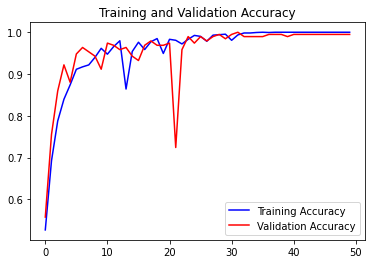

<Figure size 432x288 with 0 Axes>

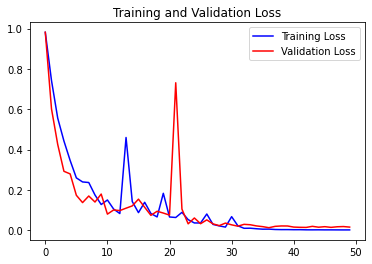

In [19]:
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**Testing the model and exporting the results to a csv file**

In [20]:
test_generator.reset()
filenames=test_generator.filenames
nb_samples=len(filenames)
pred=model.predict_generator(test_generator,steps=nb_samples)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [21]:
predicted_class_indices=np.argmax(pred,axis=1)

In [22]:
labels=(train_generator.class_indices)
labels=dict((v,k) for k,v in labels.items())
predictions=[labels[k] for k in predicted_class_indices]

In [23]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})
results.to_csv("results.csv",index=False)

## Section-II : Generating featutre maps 

In this section we are going to use 'KERACT' library provided by PyPi, for genetaing the intermediate activations 

In [24]:
!pip install keract

In [25]:
from keract import get_activations
import numpy as np

In [29]:
from skimage.color import rgb2gray
input_image=plt.imread('/content/drive/MyDrive/Colab Notebooks/Transfer Learning/Day 1/test_rps/paper.png')

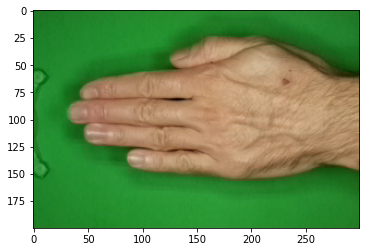

In [30]:
plt.imshow(input_image)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 8)       224       
_________________________________________________________________
activation (Activation)      (None, 198, 298, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 8)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 145, 8)        1608      
_________________________________________________________________
activation_1 (Activation)    (None, 95, 145, 8)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 72, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 27072)             0

conv2d_input (1, 200, 300, 3) 


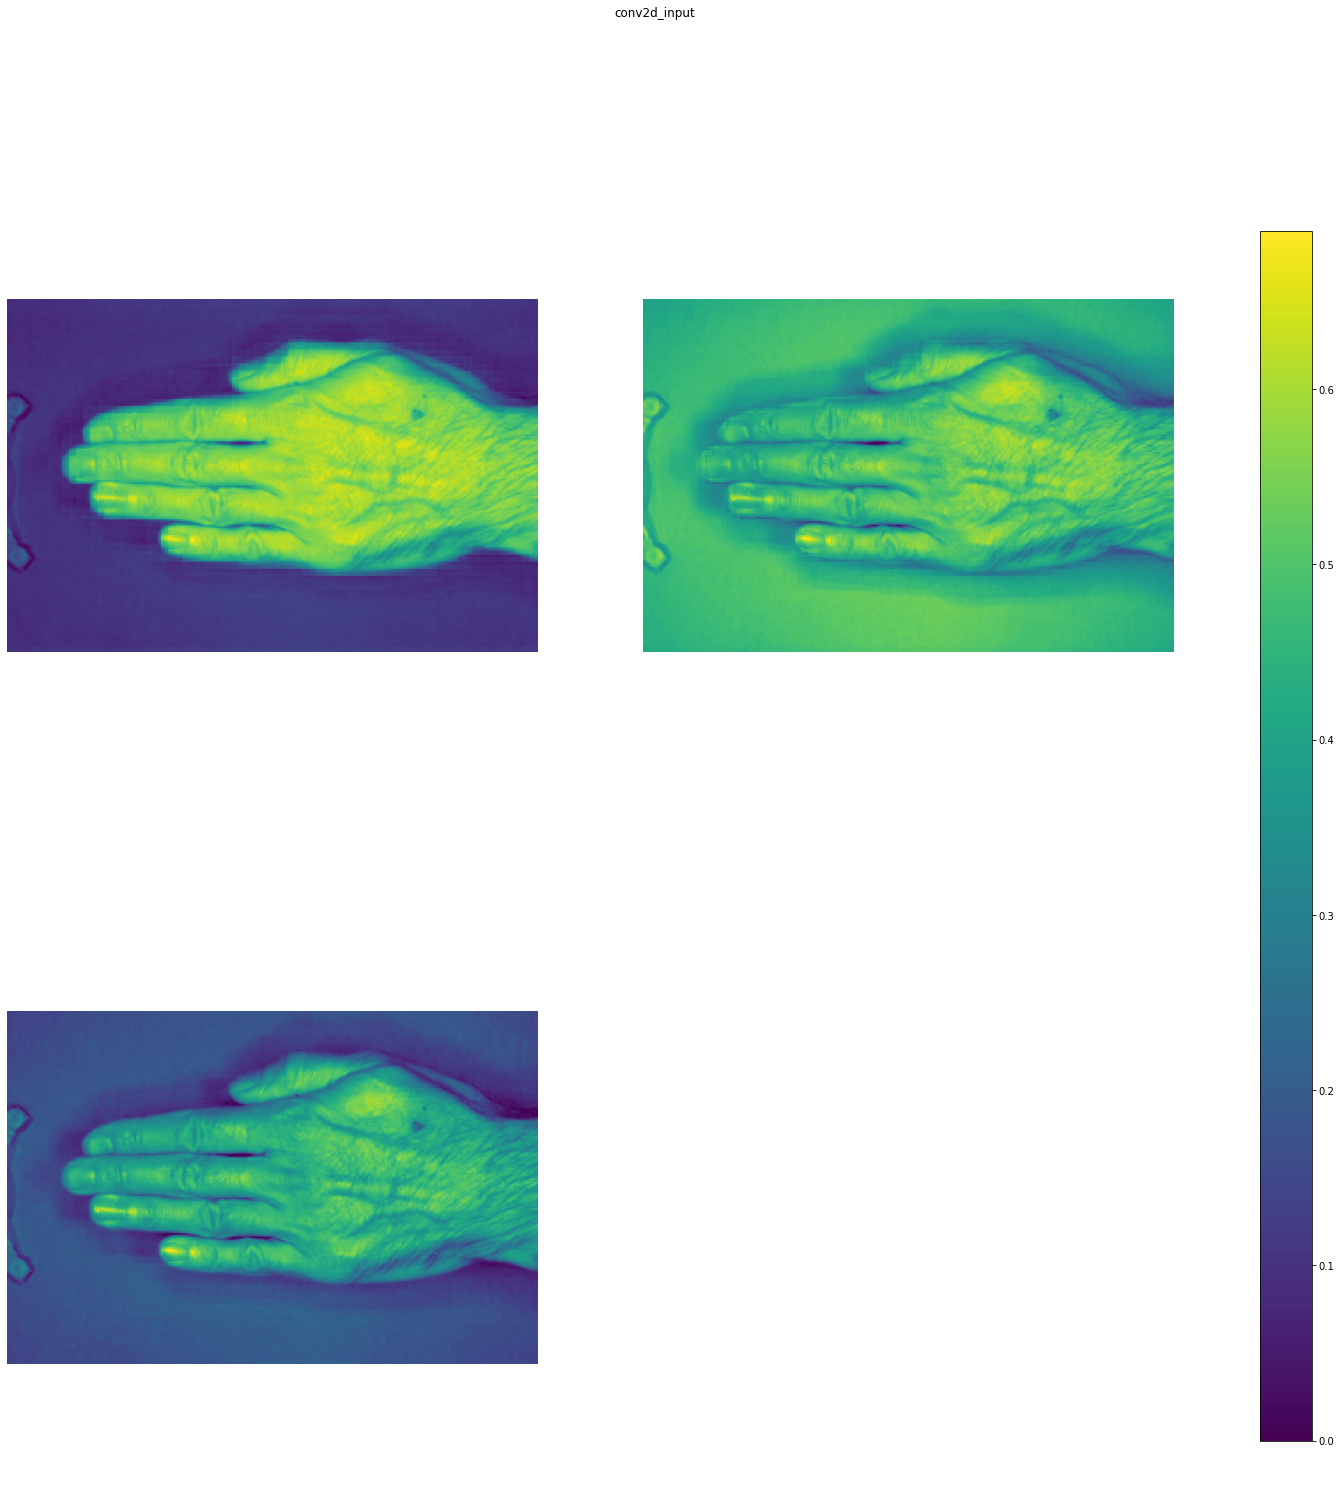

conv2d (1, 198, 298, 8) 


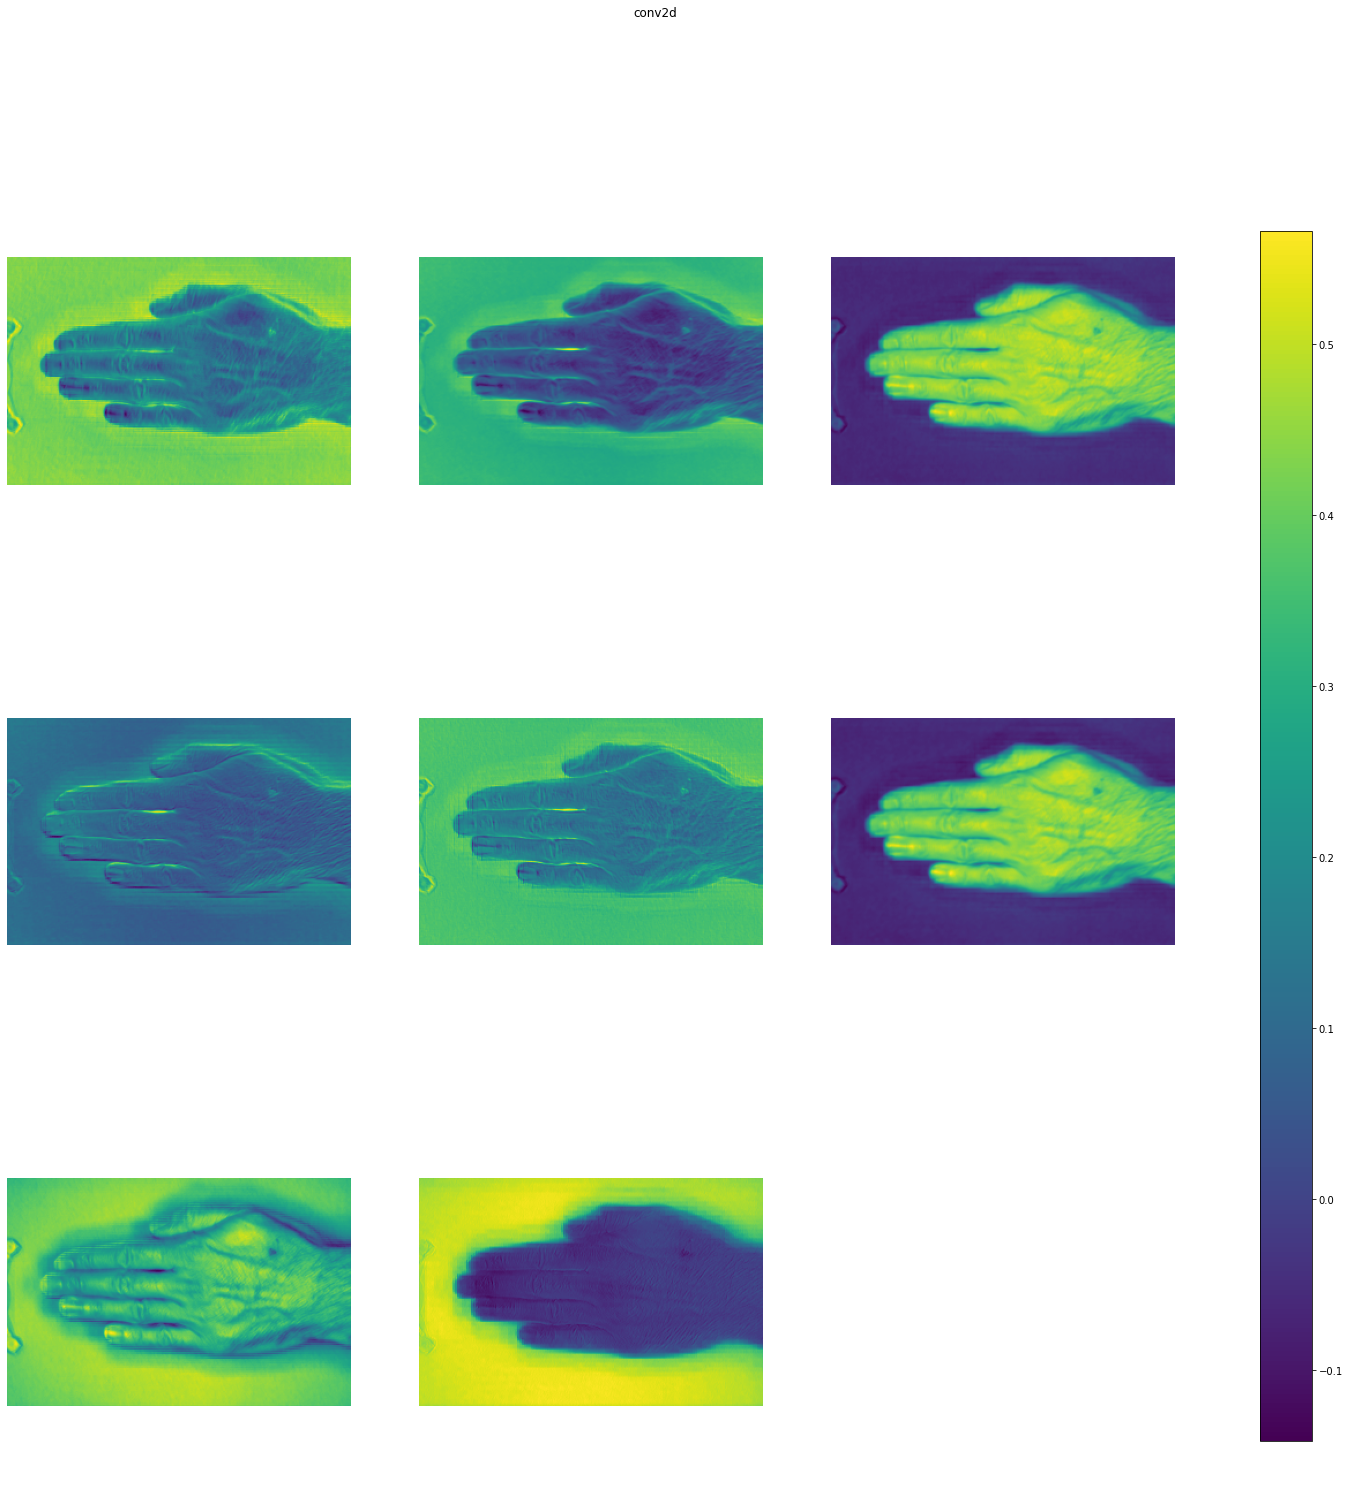

activation (1, 198, 298, 8) 


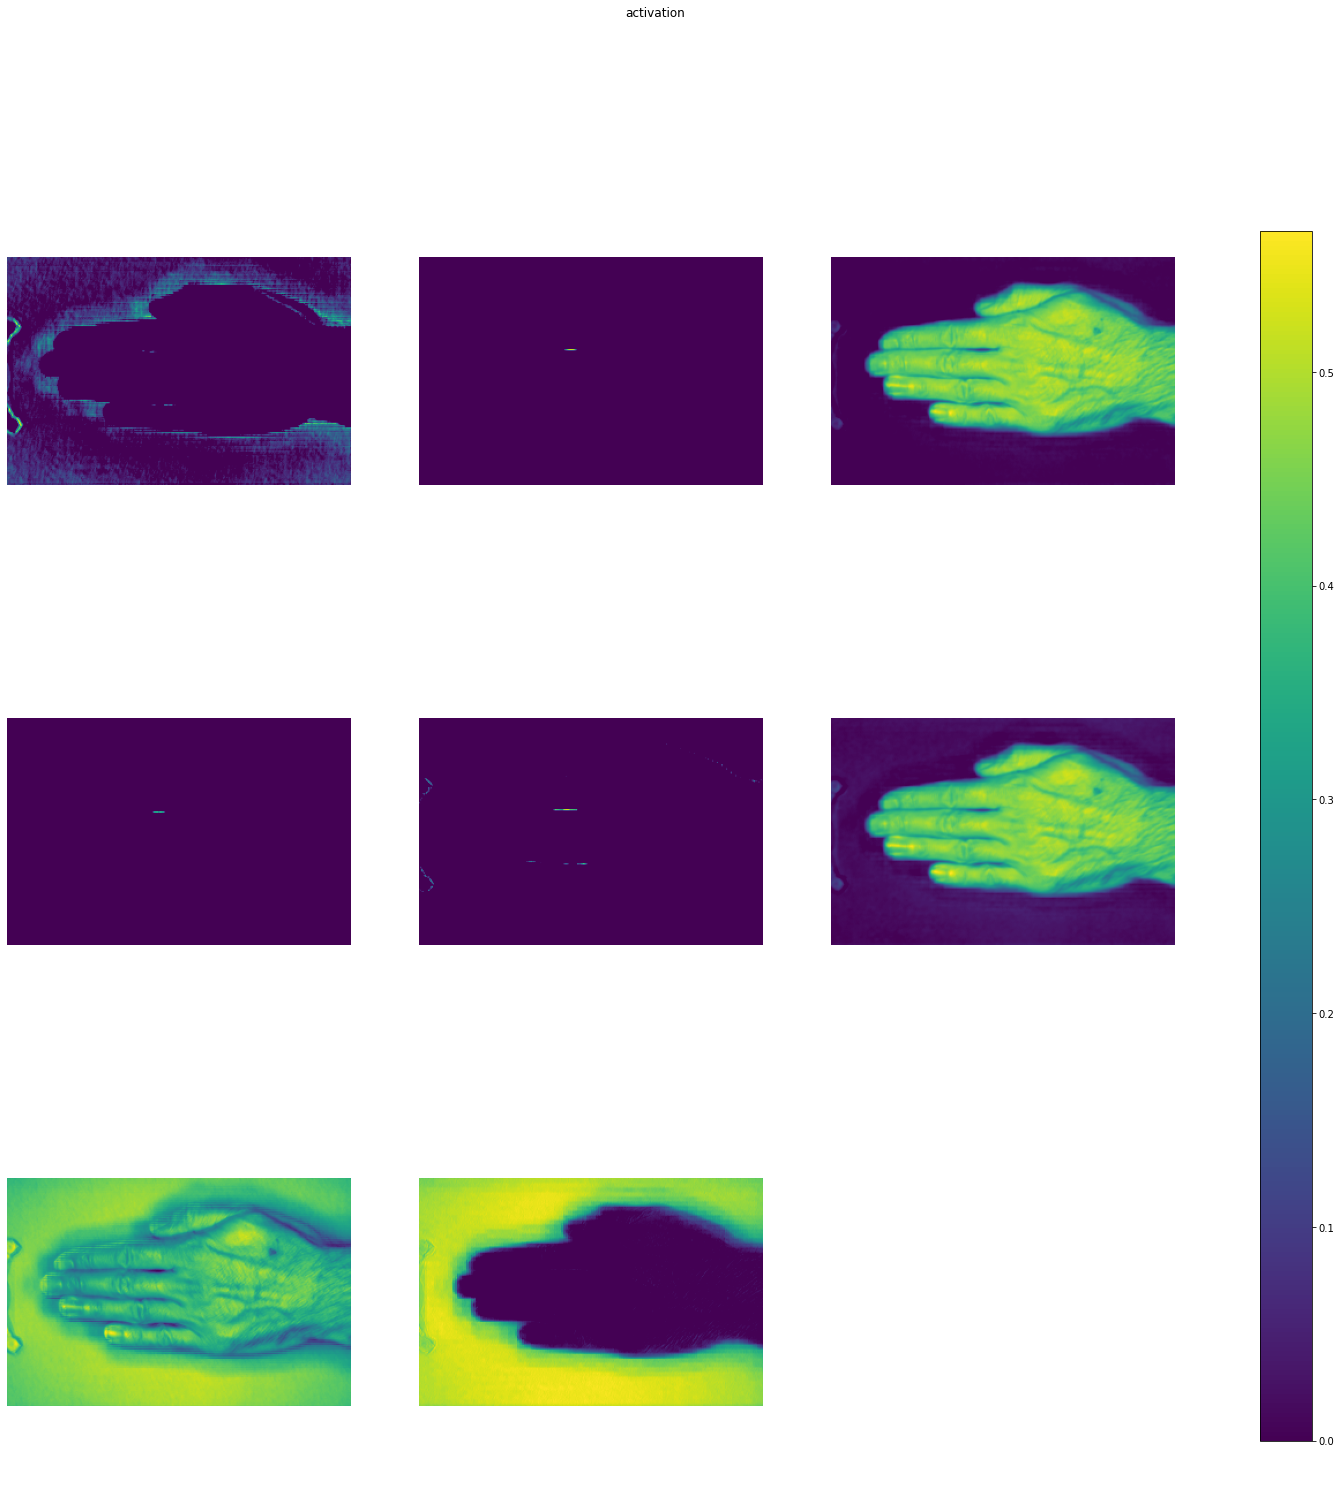

max_pooling2d (1, 99, 149, 8) 


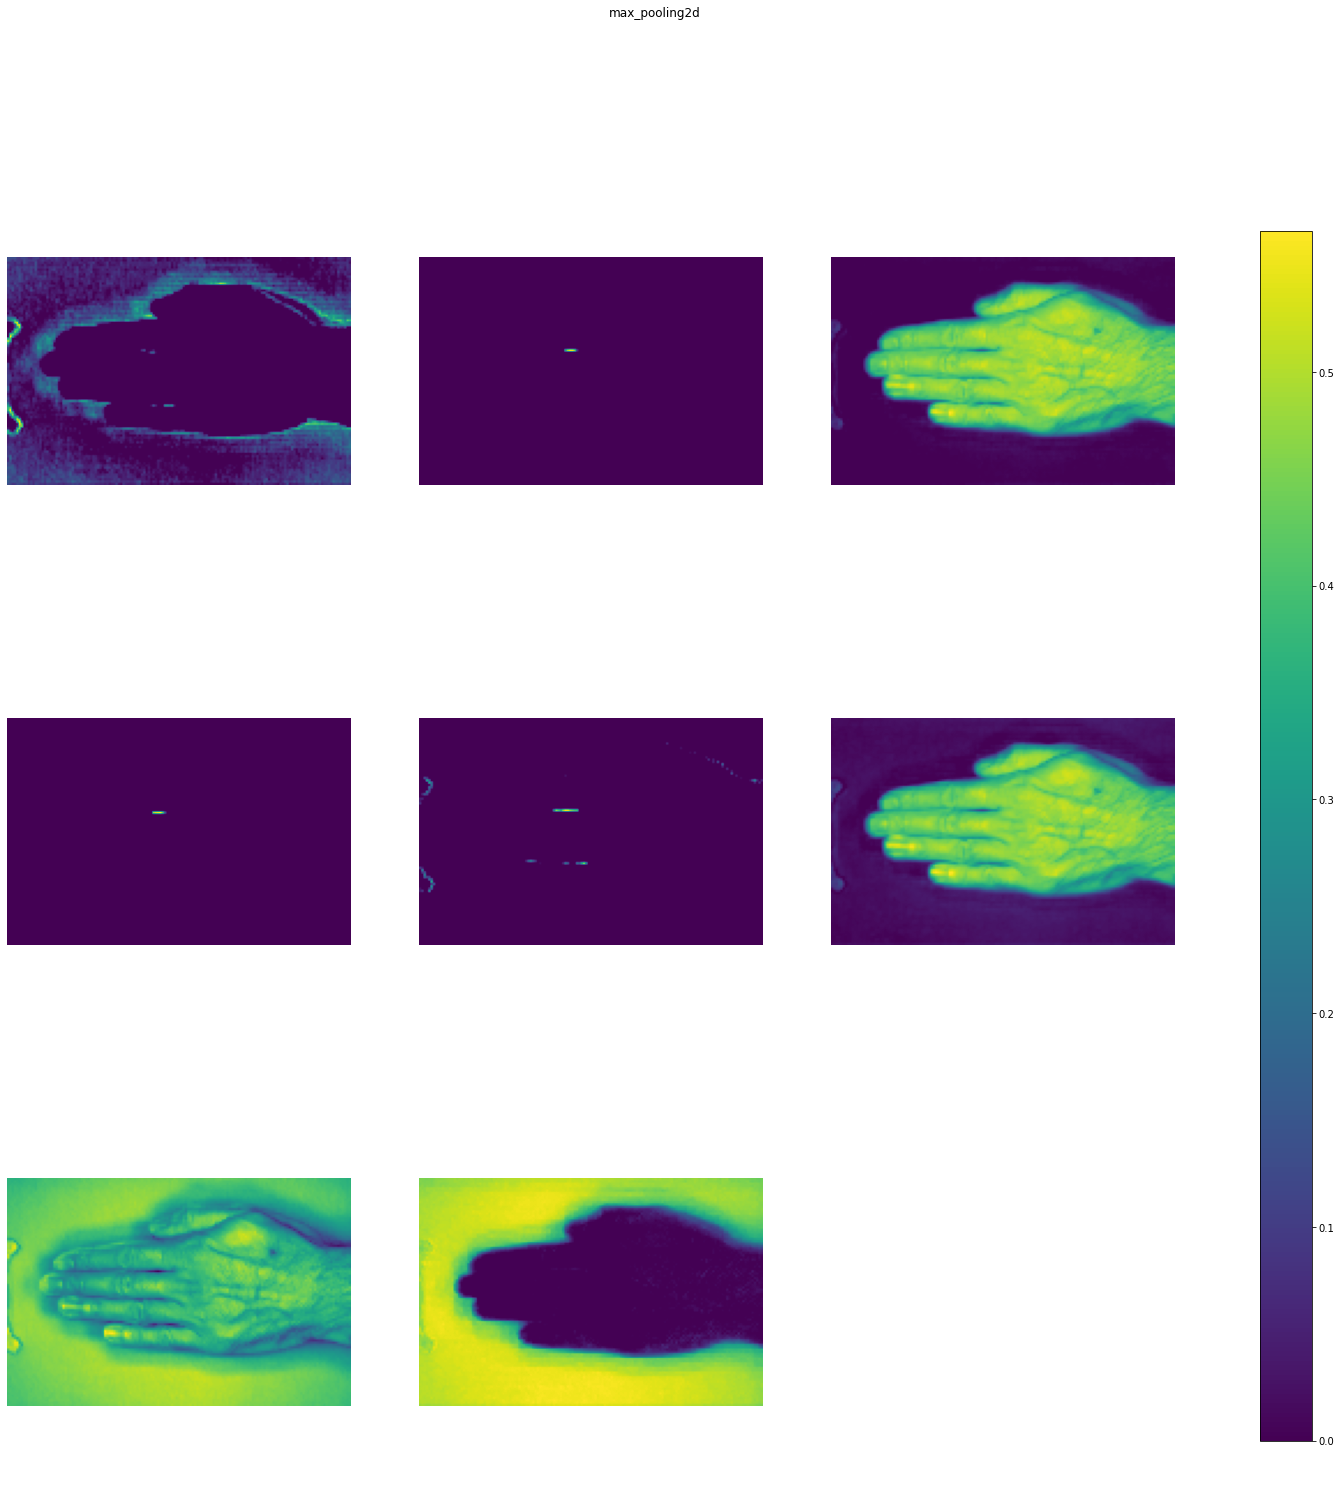

conv2d_1 (1, 95, 145, 8) 


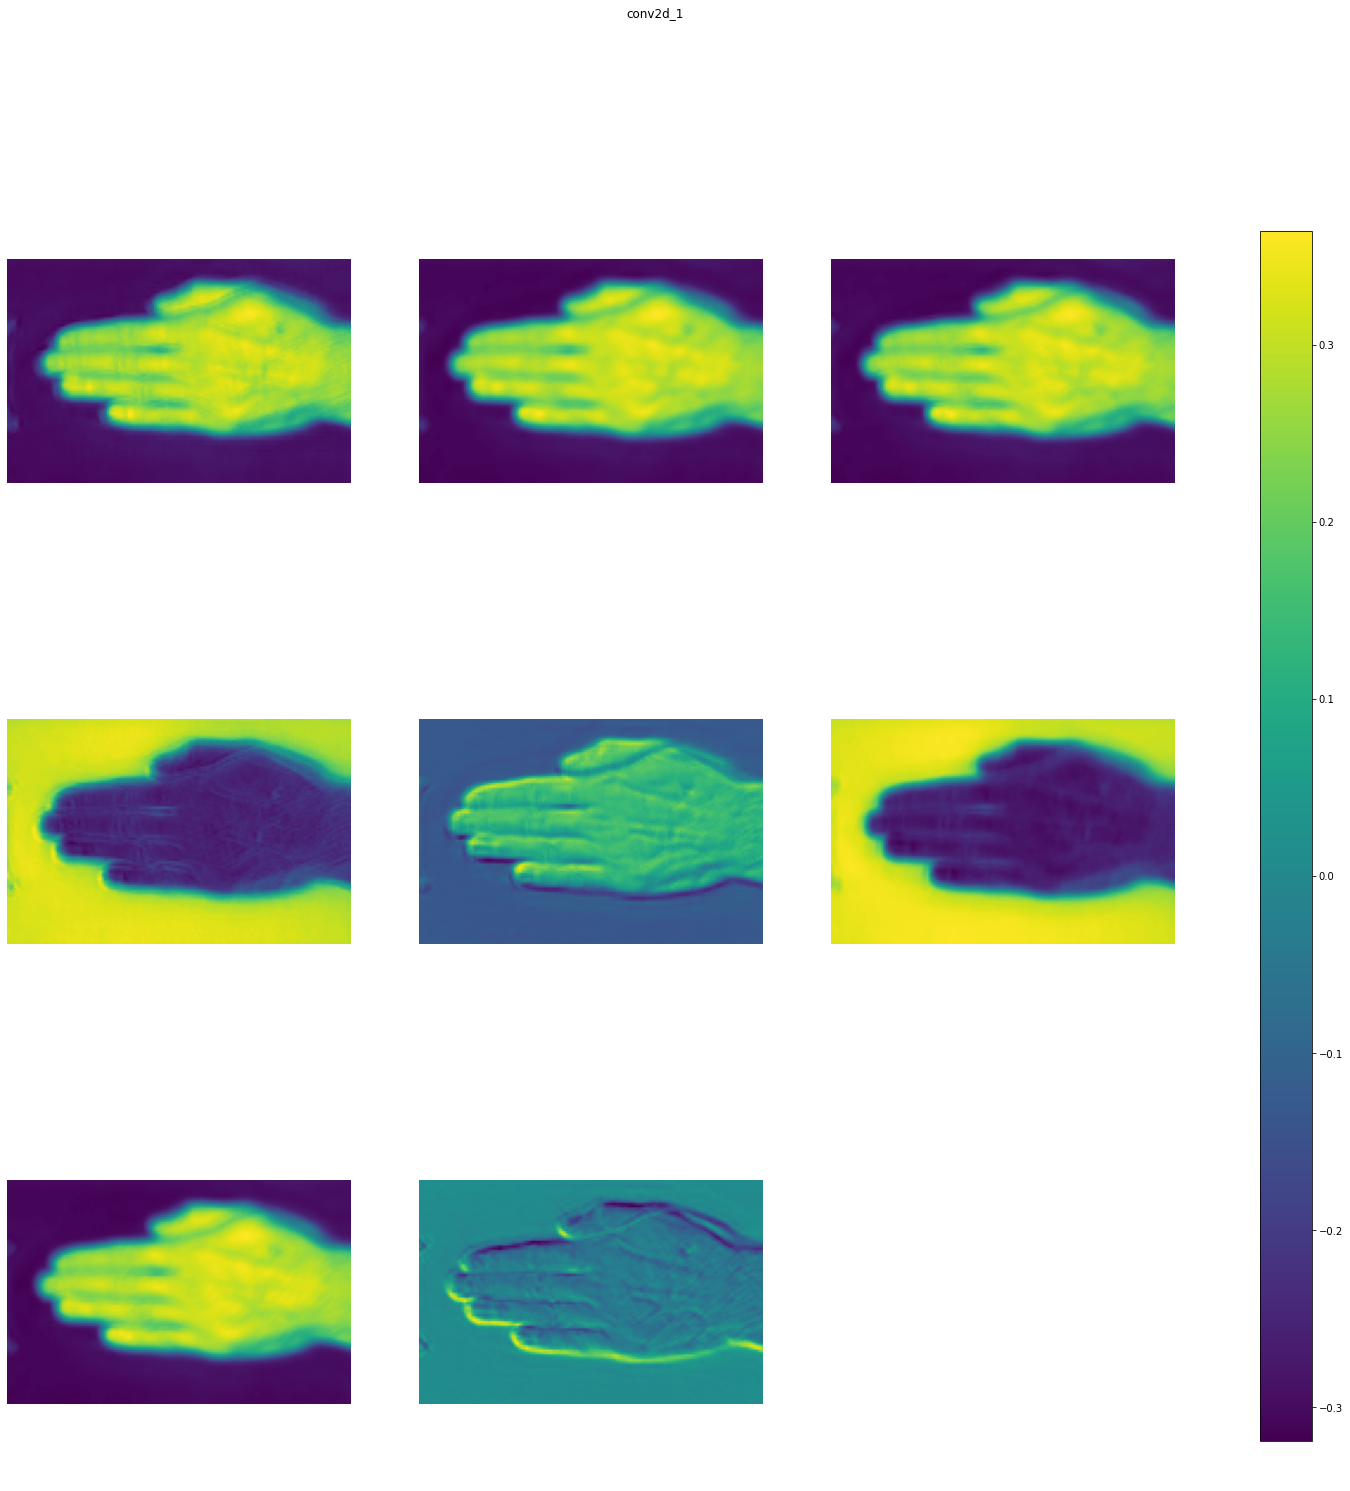

activation_1 (1, 95, 145, 8) 


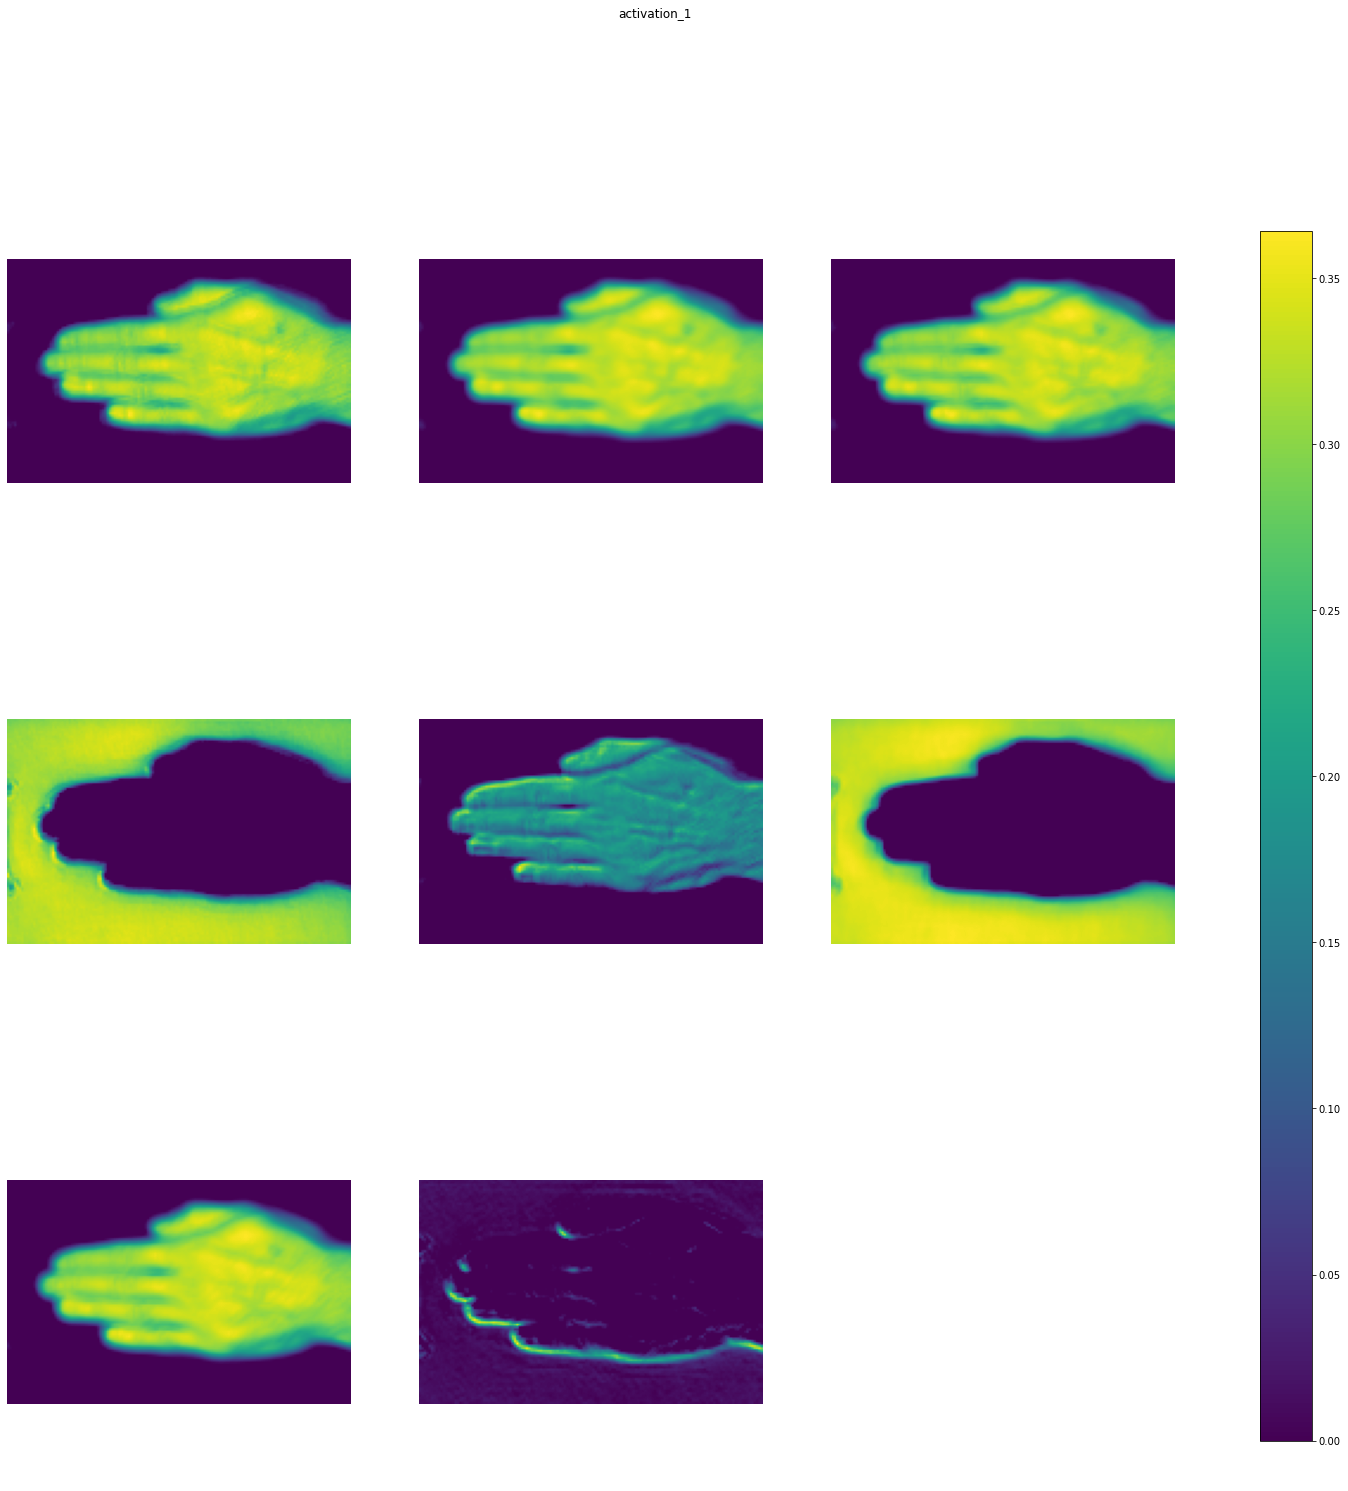

max_pooling2d_1 (1, 47, 72, 8) 


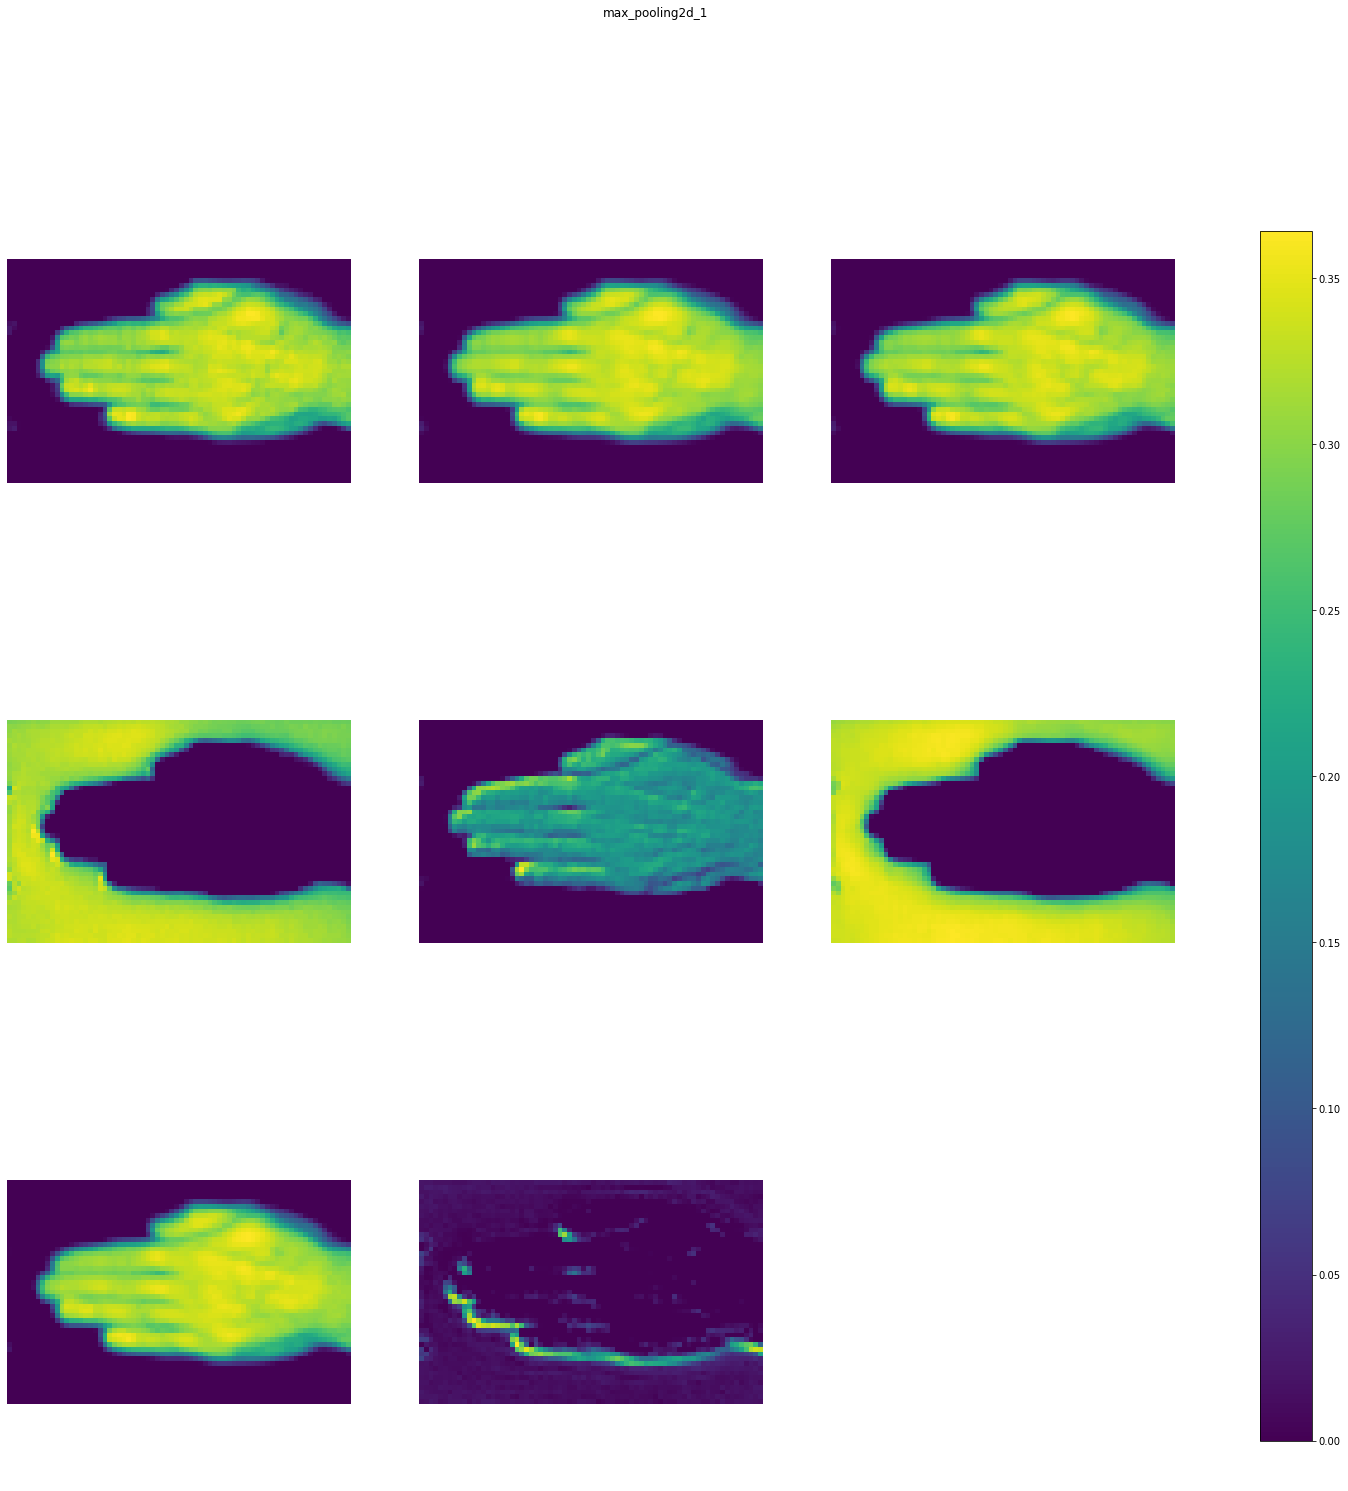

flatten (1, 27072) 


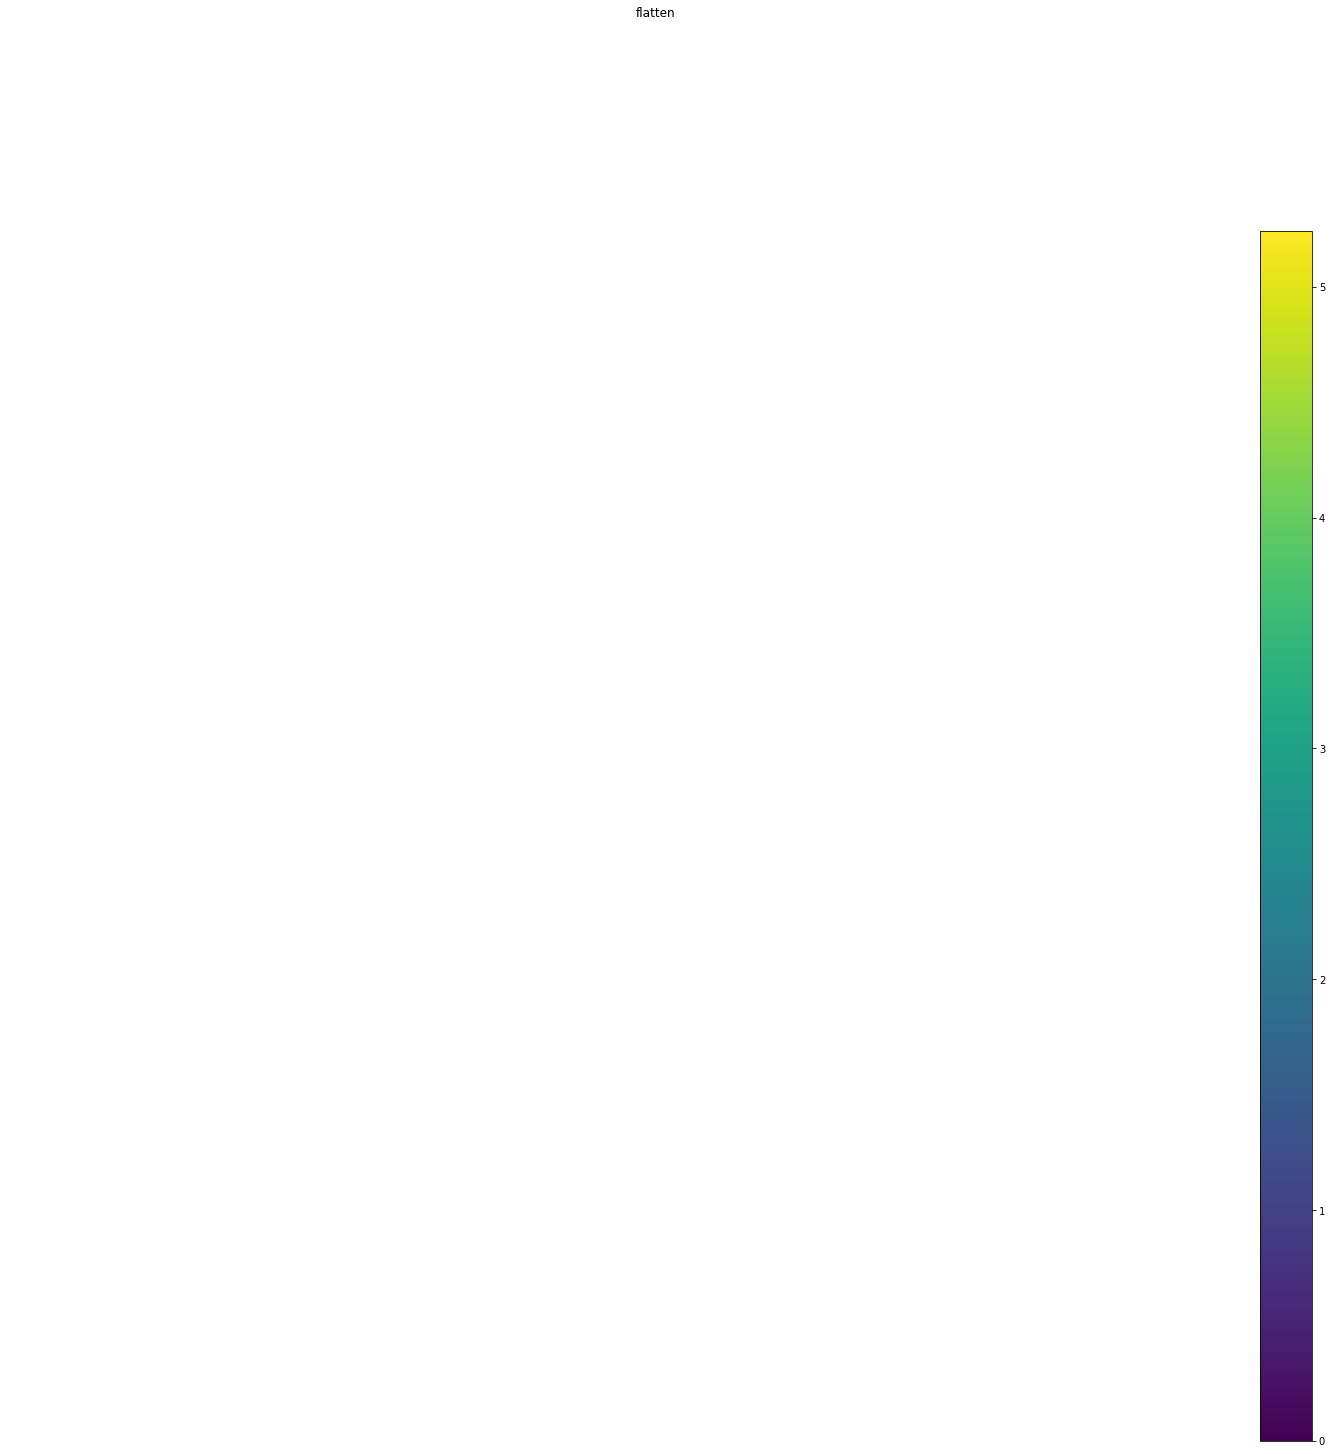

dense (1, 256) 


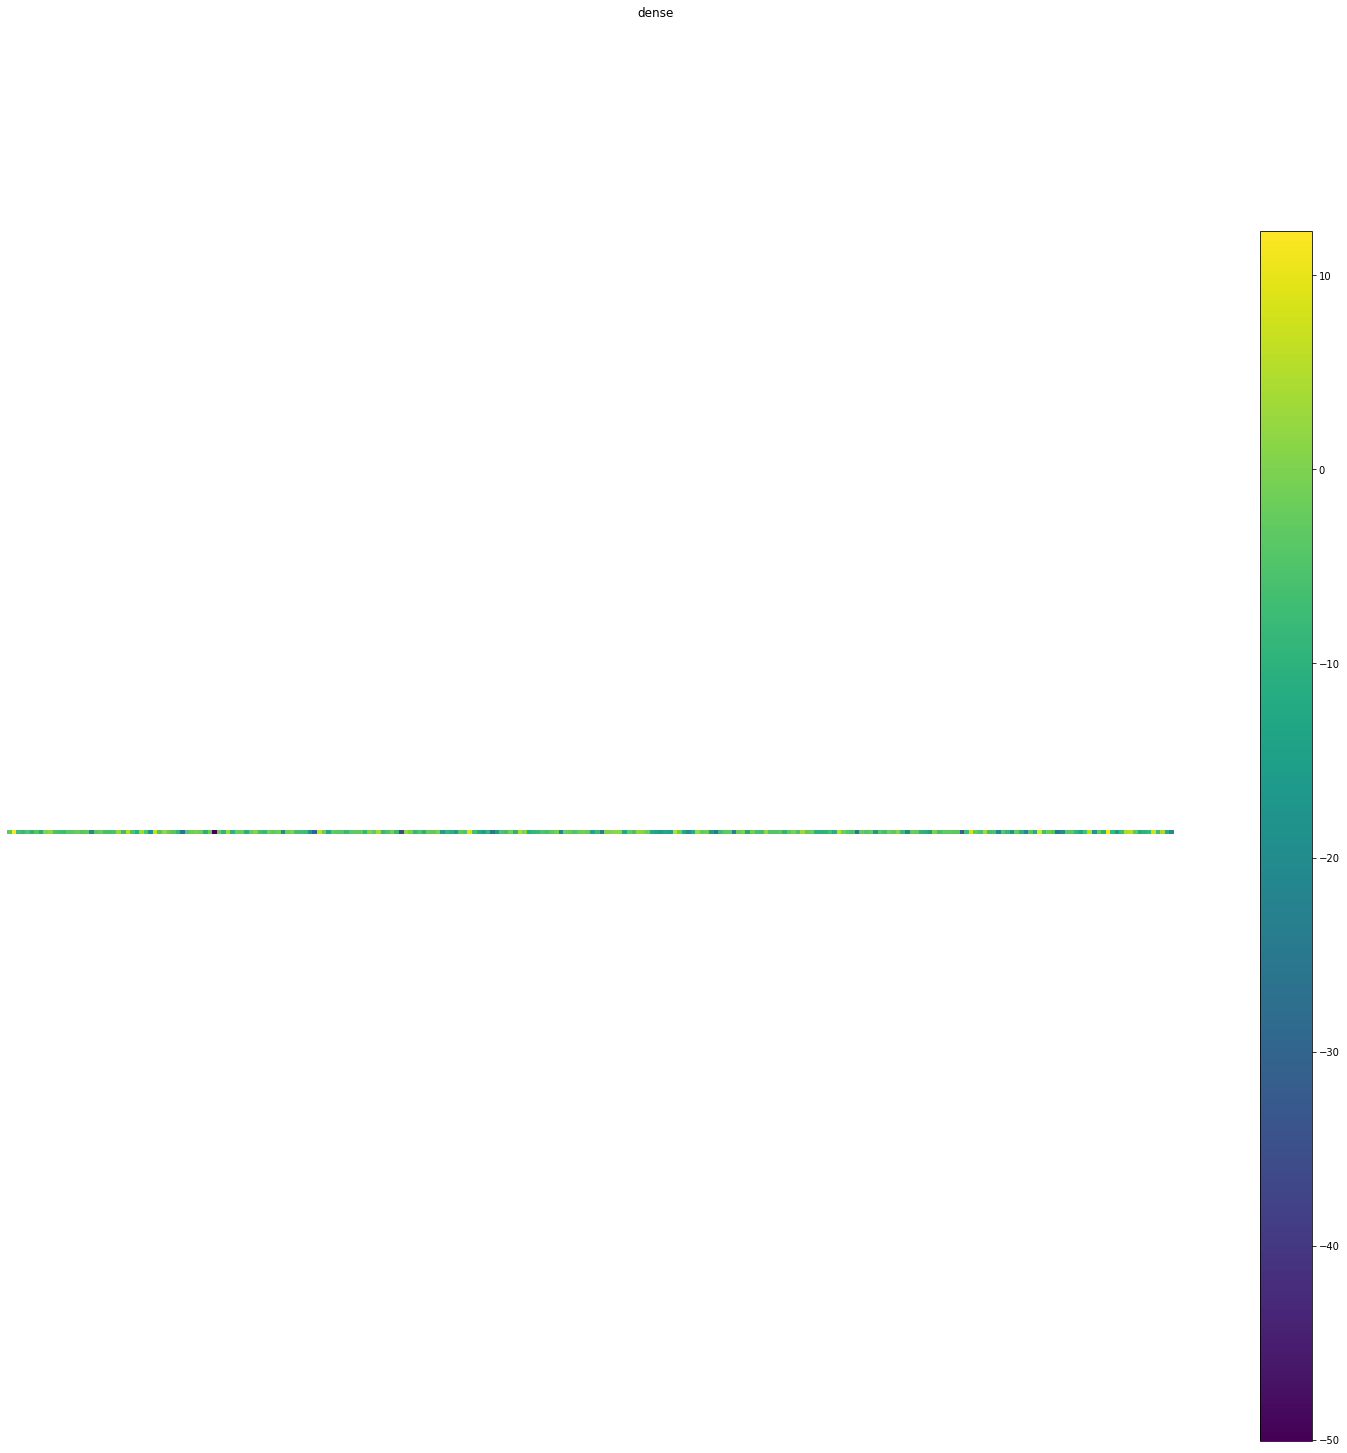

activation_2 (1, 256) 


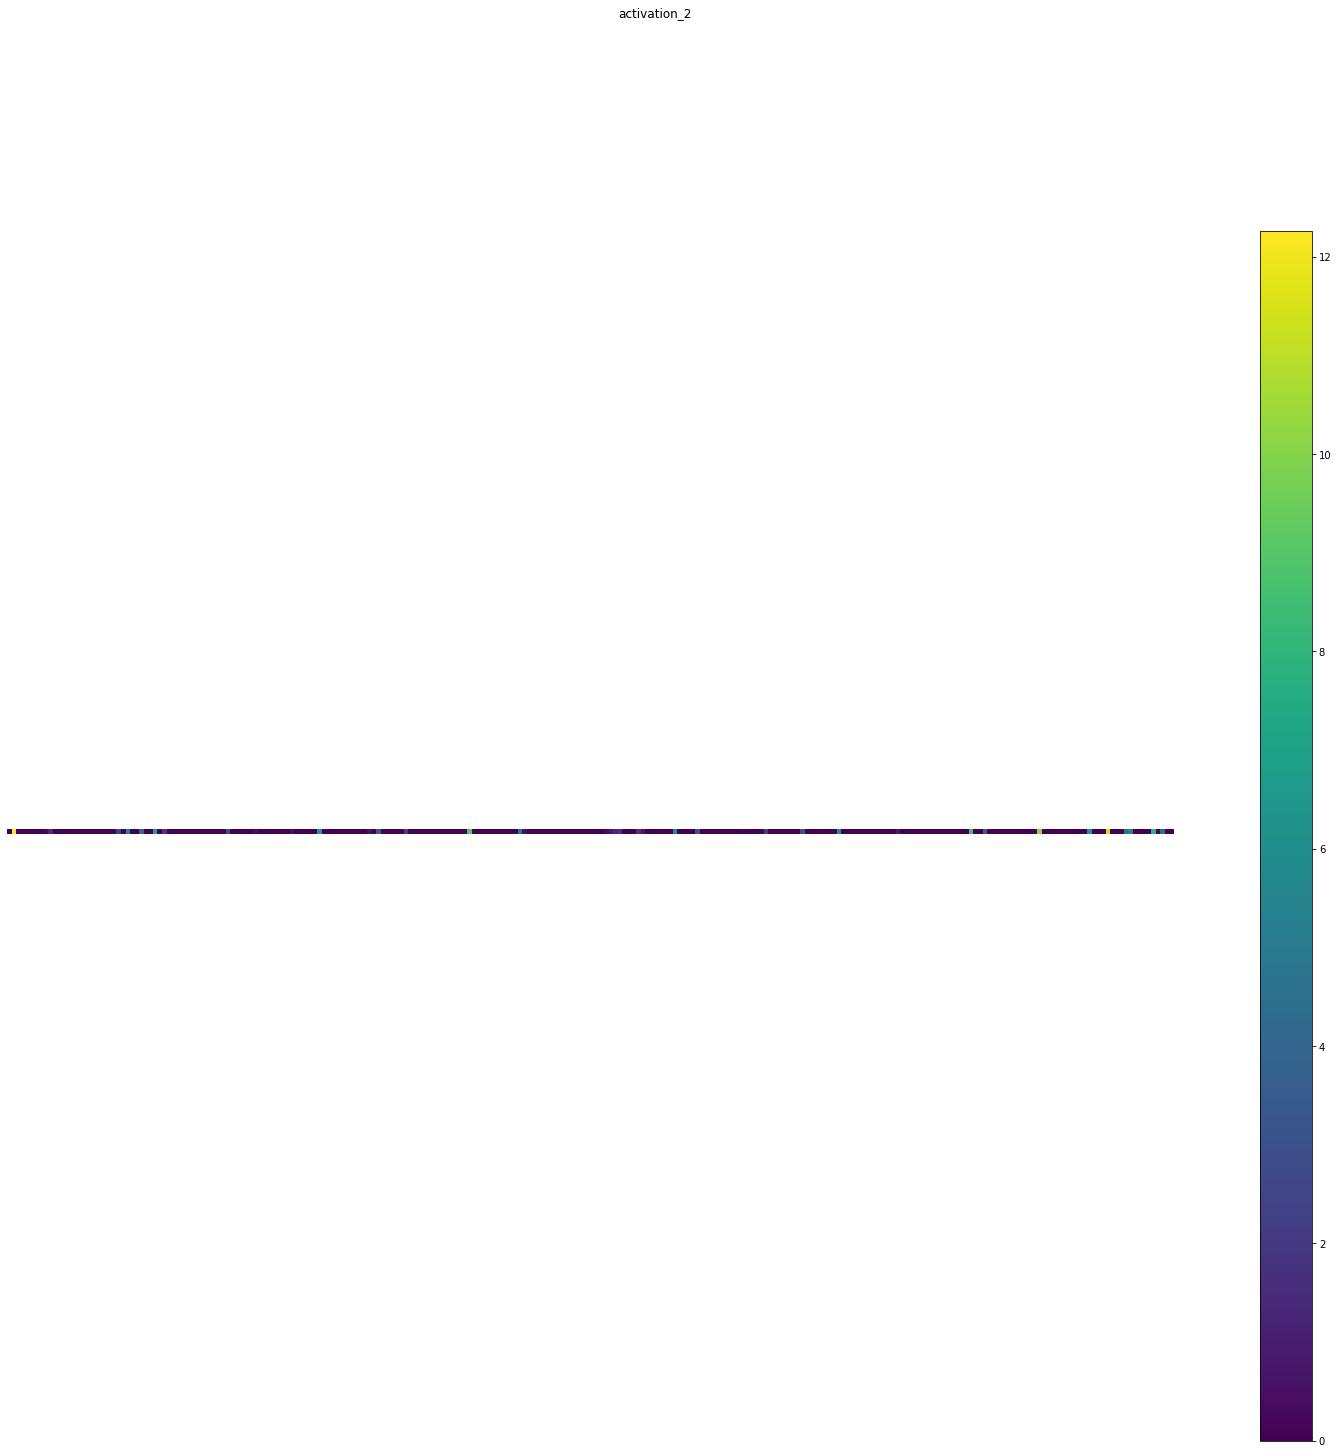

dense_1 (1, 3) 


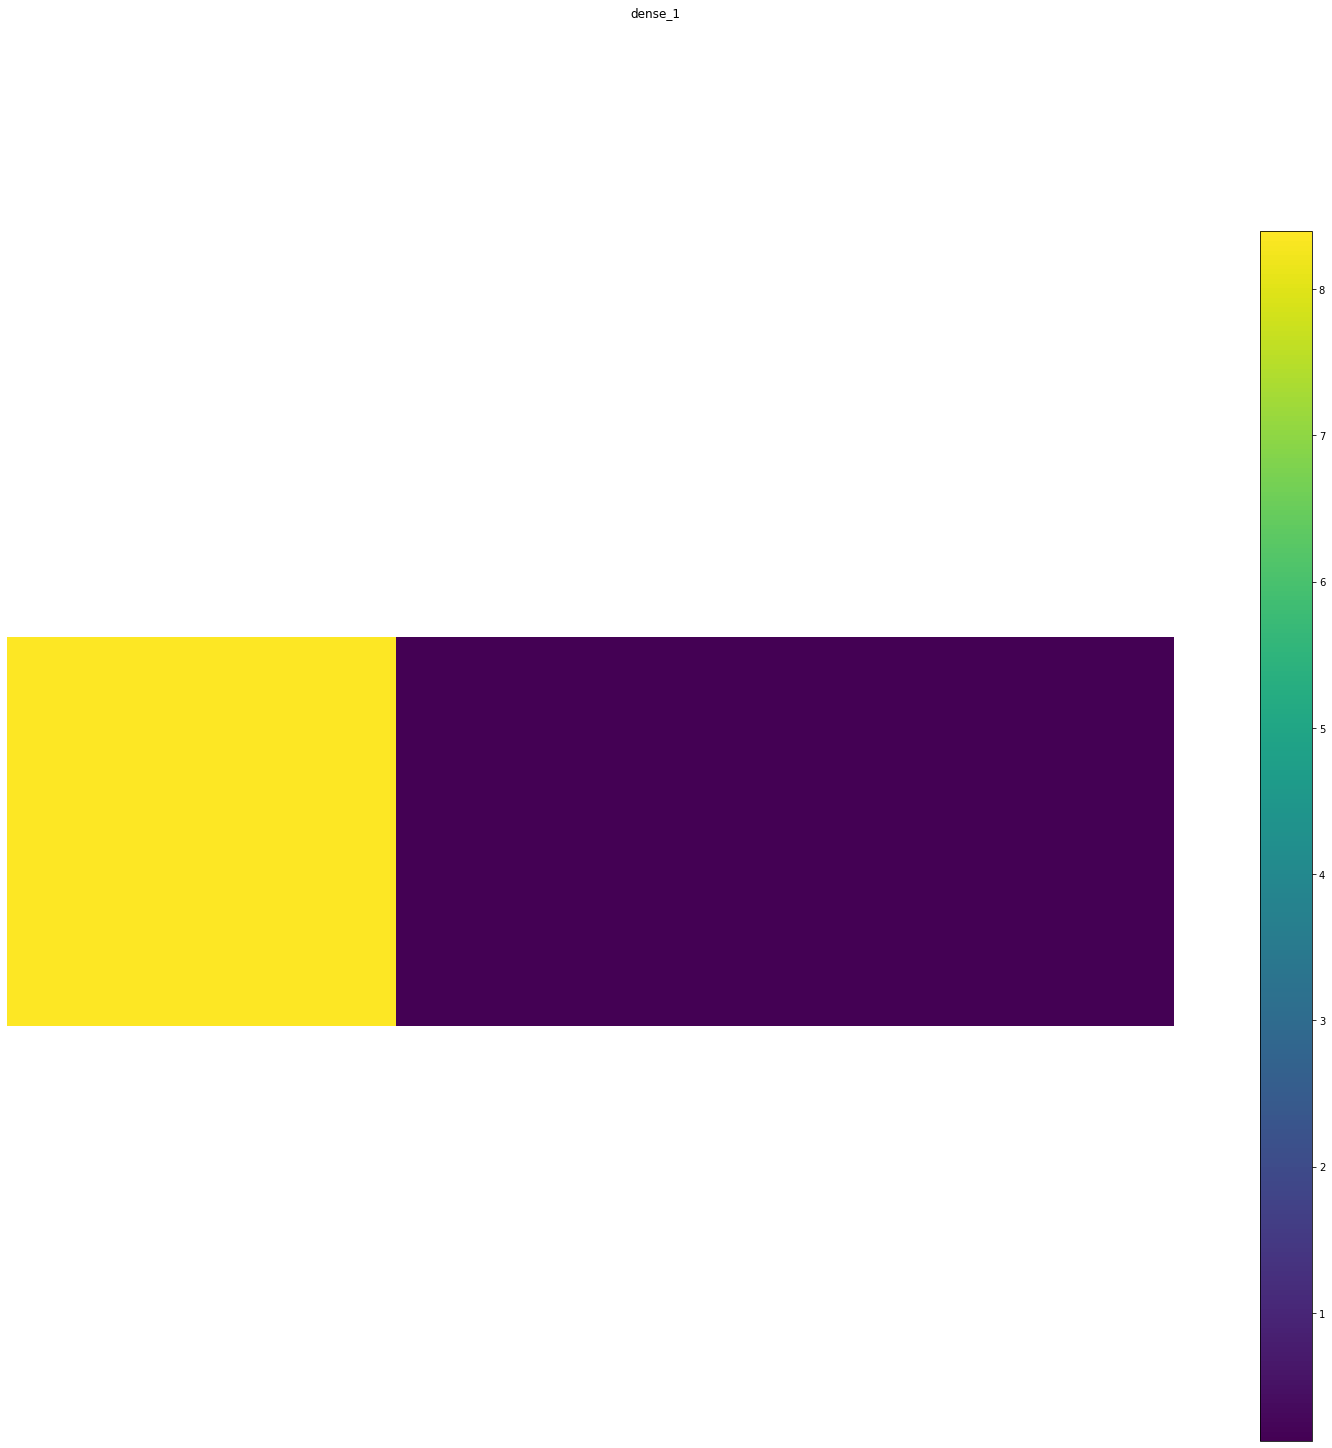

activation_3 (1, 3) 


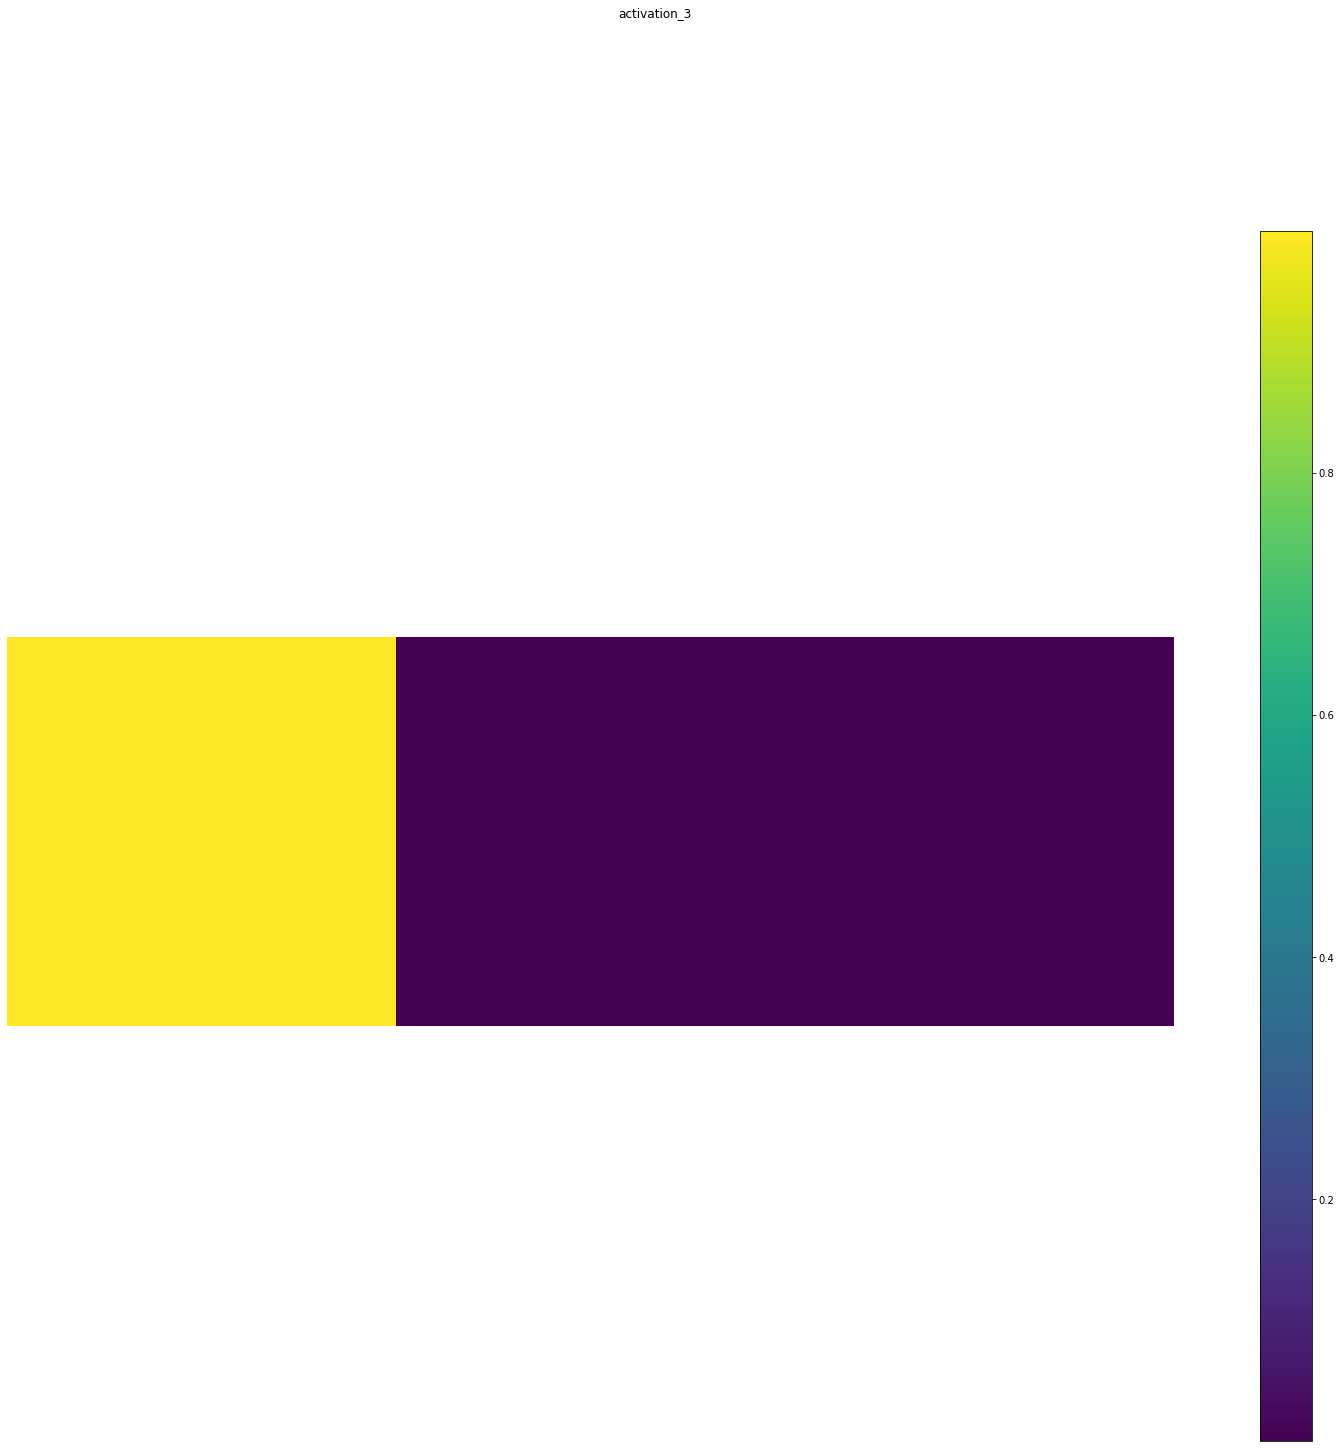

In [32]:
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import keract
image = img_to_array(input_image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
activations = keract.get_activations(model,image)
# first = activations.get('block1_conv1/Relu:0')
keract.display_activations(activations)

-------------------------------